In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as pp
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
cdata= pd.read_csv("city_data.csv")
rdata= pd.read_csv("ride_data.csv")

#merge tables
mrgdata= pd.merge(rdata, cdata, how="left", on=['city', 'city'])
#mrgdata= mrgdata.sort_values('city')
mrgdata.head()
# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

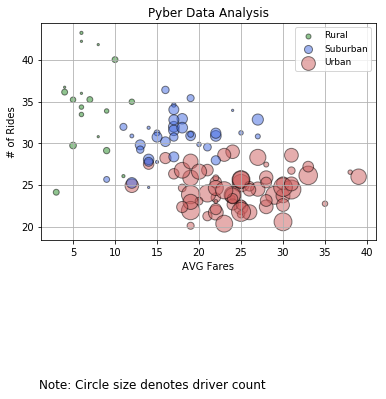

In [24]:
# Obtain the x and y coordinates for each of the three city types
citydf= mrgdata.groupby(['city'])
rural= mrgdata.loc[mrgdata["type"]=="Rural",:]
urban= mrgdata.loc[mrgdata["type"]=="Urban",:]
Surban= mrgdata.loc[mrgdata["type"]=="Suburban",:]
#groupby cities and metro area
rcity= rural.groupby(['city'])
ucity= urban.groupby(['city'])
scity= Surban.groupby(['city'])
#counts number of rides in a metro areas
rcount= rural['city'].value_counts().sort_index()
ucount= urban['city'].value_counts().sort_index()
scount= Surban['city'].value_counts().sort_index()
#average cost of rides
avgr= rcity['fare'].sum()/rcount
avgu= ucity['fare'].sum()/ucount
avgs= scity['fare'].sum()/scount
#driver count using mean
drivers= cdata
drivers= drivers.set_index('city')
dcount= drivers.groupby(['city']).mean()
dcount_rural= rcity['driver_count'].mean()
dcount_urban= ucity['driver_count'].mean()
dcount_Surban= scity['driver_count'].mean()
#Build the scatter plots for each city types
rlegend= pp.scatter(rcount, avgr, marker="o", facecolors="forestgreen", edgecolors="black",
            s=dcount_rural*5, alpha=.5)
ulegend= pp.scatter(ucount, avgu, marker="o", facecolors="indianred", edgecolors="black",
            s=dcount_urban*5, alpha=.5)
slegend= pp.scatter(scount, avgs, marker="o", facecolors="royalblue", edgecolors="black",
            s=dcount_Surban*5, alpha=.5)
# Incorporate the other graph properties
pp.title("Pyber Data Analysis")
pp.ylabel("# of Rides")
pp.xlabel("AVG Fares")
pp.grid()
# Create a legend
pp.legend((rlegend, slegend, ulegend),('Rural','Suburban','Urban'),
         scatterpoints=1,loc='upper right',fontsize=9)
# Incorporate a text label regarding circle size
pp.text(.95,0.5,'Note: Circle size denotes driver count', fontsize=12)
# Save Figure
pp.savefig("PyberGraph")

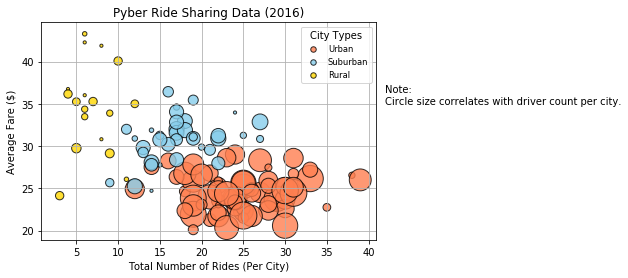

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


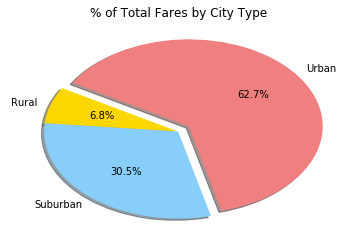

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


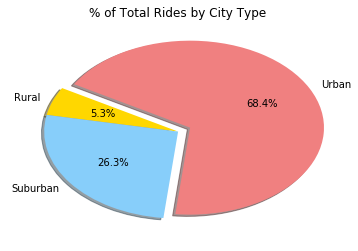

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


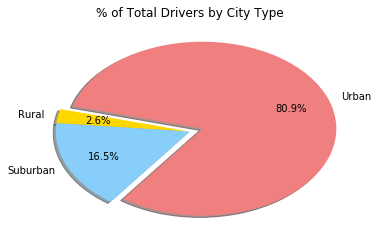

In [6]:
# Show Figure
plt.show()